# Neural Network

## Old Part

In [1]:
import random
import numpy as np
import glob 
import platform
import cv2 
import os 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import argparse
import imutils
import scipy.spatial
from collections import Counter
import matplotlib.pyplot as plt
import statistics
import matplotlib.animation as animation
from matplotlib import style


In [2]:
def image_to_feature_vector(image, size=(32, 32)):
  image = np.array(image)
  return cv2.resize(image, size).flatten()

def load_images(img_dir):
  data_path = os.path.join("../Assignment1_AhmedAboutaleb/flower_photos",img_dir,'*g') 
  files = glob.glob(data_path)
  files.sort()
  data = [] 
  data = np.array([cv2.imread(img, cv2.IMREAD_UNCHANGED) for img in files])
  data = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in data])
  return data

In [3]:
flower_types = ['tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']
for img_dir in flower_types: # Enter Directory of all images  
  data = load_images(img_dir)
  vars()['feature_' + img_dir] = np.array(data)

In [4]:
x = ['tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']
n = 100
x = np.array([i for i in x for _ in range(n)])

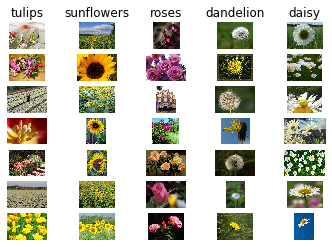

In [5]:
classes = ['tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']

num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(x == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        if (cls == 'tulips'):
          plt.imshow(feature_tulips[idx].astype('uint8'))
        elif (cls == 'daisy'):
          plt.imshow(feature_daisy[idx].astype('uint8'))
        elif (cls == 'sunflowers'):
          plt.imshow(feature_sunflowers[idx].astype('uint8'))
        elif (cls == 'dandelion'):
          plt.imshow(feature_dandelion[idx].astype('uint8'))
        elif (cls == 'roses'):
          plt.imshow(feature_roses[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
f_tulips = []
for i in range(0,feature_tulips.size):
  feature_tulips[i] = np.array(feature_tulips[i])
  f_tulips.append(cv2.resize(feature_tulips[i], (32, 32)))
f_tulips = np.array(f_tulips)

f_daisy = []
for i in range(0,feature_daisy.size):
  feature_daisy[i] = np.array(feature_daisy[i])
  f_daisy.append(cv2.resize(feature_daisy[i], (32, 32)))
f_daisy = np.array(f_daisy)

f_dandelion = []
for i in range(0,feature_dandelion.size):
  feature_dandelion[i] = np.array(feature_dandelion[i])
  f_dandelion.append(cv2.resize(feature_dandelion[i], (32, 32)))
f_dandelion = np.array(f_dandelion)

f_sunflowers = []
for i in range(0,feature_sunflowers.size):
  feature_sunflowers[i] = np.array(feature_sunflowers[i])
  f_sunflowers.append(cv2.resize(feature_sunflowers[i], (32, 32)))
f_sunflowers = np.array(f_sunflowers)

f_roses = []
for i in range(0,feature_roses.size):
  feature_roses[i] = np.array(feature_roses[i])
  f_roses.append(cv2.resize(feature_roses[i], (32, 32)))
f_roses = np.array(f_roses)

In [7]:
# train_set = []
# for i in range(500):
#     train_set.append(f_tulips[i])
#     train_set.append(f_sunflowers[i])
#     train_set.append(f_roses[i])
#     train_set.append(f_dandelion[i])
#     train_set.append(f_daisy[i])
# print(f_tulips.shape)
# print(f_sunflowers.shape)
# print(f_roses.shape)
# print(f_dandelion.shape)
# print(f_daisy.shape)
train_set = np.concatenate((f_tulips[0:699] , f_sunflowers[0:599], f_roses[0:541],f_dandelion[0:798], f_daisy[0:533]))
test_set = np.concatenate((f_tulips[699:799] , f_sunflowers[599:699], f_roses[541:641],f_dandelion[798:898], f_daisy[533:633]))
all_data = np.concatenate((f_tulips, f_sunflowers, f_roses,f_dandelion, f_daisy))
all_mean = np.mean(all_data)
all_std = np.std(all_data)
train_set = (train_set - all_mean)/all_std
test_set = (test_set - all_mean)/all_std
x = [0, 1, 2, 3, 4]
test_labels = np.array([i for i in x for _ in range(100)])
# train_labels = np.tile(x, 500)
train_labels = np.concatenate((np.repeat(0, 699), np.repeat(1, 599), np.repeat(2, 541), np.repeat(3, 798), np.repeat(4, 533)))

In [8]:
print (train_set.shape)
print (test_set.shape)
print (train_labels.shape)
print (test_labels.shape)

(3170, 32, 32, 3)
(500, 32, 32, 3)
(3170,)
(500,)


## New Part

### Layers

### 1. Source code of your implementation, including the random seed (to reproduce your results) [3%]


In [9]:
class Weight_Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        np.random.seed(3)
        self.W = np.random.randn(input_size, output_size) / np.sqrt(input_size)
        np.random.seed(4)
        self.B = np.random.randn(1, output_size) / np.sqrt(input_size)

        
    def forward(self, input):
        self.input = input
        return np.dot(input, self.W) + self.B

        
    def backward(self, batch_size, dOutput, learning_rate, reg):
        dInput = np.dot(dOutput, self.W.T)
        self.dW = np.dot(self.input.T, dOutput)/ batch_size
        self.dW += reg*self.W
        self.dB = np.array([np.mean(dOutput, axis = 0)])
        self.W -= learning_rate * self.dW
        self.B -= learning_rate * self.dB    
        return dInput

In [10]:
import math
def conv(image, kernel, padding=0, strides=1):
    xKernShape = kernel.shape[1]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[1]
    yImgShape = image.shape[1]
    num_channels = kernel.shape[3]
    num_filters = kernel.shape[0]
    xOutput = int((math.floor(xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int((math.floor(yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput, num_filters))
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2, num_channels))
        for z in range(num_channels):
            imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding), z] = image[:, :, z]
    else:
        imagePadded = image
    imagePadded = np.repeat(imagePadded[np.newaxis, :, :, :], num_filters, axis=0)

    for y in range(xOutput):
        for x in range(yOutput):
            output[x, y] = (kernel*imagePadded[:, strides*x: strides*x + xKernShape, strides*y: strides*y + yKernShape, :]).sum(axis = (1, 2, 3))
    return output

In [11]:
class conv_layer:
    def __init__(self,filters=16, filter_size=5, channels=3, width=32, height=32 ,stride=1,pad=2, std=5e-2):
        np.random.seed(2)
        self.w = np.random.randn(filters, filter_size, filter_size, channels) * std
        self.b = np.zeros(filters)
        self.stride=stride
        self.pad=pad
        self.channels = channels 
                     
    def forward(self,inp):
        self.inppp = inp.transpose(3, 1, 2, 0)
        out = [] 
        for x in inp:
            out.append(conv(x, self.w, self.pad, self.stride))
        out = np.array(out)
        return out
                   
    def backward(self,batch_size ,dOutput, learning_rate, reg):
        dInput = [] 
        weights = self.w.transpose(3, 1, 2, 0)
        dOutputt = dOutput.transpose(3, 1, 2, 0)
        for x in dOutput:
            dInput.append(conv(x, np.rot90(weights, 2, axes=(-3, -2)), self.pad, self.stride))
        dInput = np.array(dInput)/self.channels
        dw = []
        for x in dOutputt:
            dw.append(conv(x, self.inppp, self.pad, self.stride))
        dw = np.array(dw)
        dw = dw/batch_size
        self.w -= learning_rate * dw
        
        return dInput

In [12]:
class maxpool:
        
    def forward(self,inp):
        x = inp.transpose(0, 3, 1, 2)
        N, C, H, W = x.shape
        pool_height, pool_width = 2, 2
        stride = 2
        self.x_reshaped = x.reshape(N, C, H // pool_height, pool_height, W // pool_width, pool_width)
        out = self.x_reshaped.max(axis=3).max(axis=4)
        self.x = x
        self.out = out
        return out.transpose(0, 2, 3, 1)


    def backward(self,batch_size ,inp, learning_rate, reg):
        dout = inp.transpose(0, 3, 1, 2)
        x_reshaped = self.x_reshaped
        x = self.x
        out = self.out
        dx_reshaped = np.zeros_like(x_reshaped)
        out_newaxis = out[:, :, :, np.newaxis, :, np.newaxis]
        mask = (x_reshaped == out_newaxis)
        dout_newaxis = dout[:, :, :, np.newaxis, :, np.newaxis]
        dout_broadcast, _ = np.broadcast_arrays(dout_newaxis, dx_reshaped)
        dx_reshaped[mask] = dout_broadcast[mask]
        dx_reshaped /= np.sum(mask, axis=(3, 5), keepdims=True)
        dx = dx_reshaped.reshape(x.shape)
        return dx.transpose(0, 2, 3, 1)

In [13]:
class flatten:
    def forward(self,input):
        self.inpshape=input.shape
        return input.reshape(input.shape[0],-1)
    
    def backward(self, batch_size, dOutput, learning_rate, reg):
        return dOutput.reshape(self.inpshape) 

In [14]:
class ReLU_Layer:
    def forward(self, input):
        self.input = input
        return np.maximum(input, 0)
    
    def backward(self, batch_size, dOutput, learning_rate, reg):
        return dOutput * np.array(self.input >= 0).astype('int')

### Network

In [15]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [16]:
from sklearn.utils import shuffle    
class Network:
    def __init__(self):
        self.network = [
            conv_layer(filters=64, channels=3, width=32, height=32),
            ReLU_Layer(),
            conv_layer(filters=16, filter_size = 3, channels=64, width=32, height=32, pad = 1),
            ReLU_Layer(),
            maxpool(),
            flatten(),
            Weight_Layer(4096, 2000),
            ReLU_Layer(),
            Weight_Layer(2000, 1000),
            ReLU_Layer(),
            Weight_Layer(1000, 500),
            ReLU_Layer(),
            Weight_Layer(500, 5)
        ]

    def test(self, test_set, test_labels):
        loss = 0
        num_test = test_set.shape[0]
        Ypred = np.zeros(num_test, dtype = test_labels.dtype)
        output = np.array(test_set)
        for layer in self.network:
            output = layer.forward(output)
            
        exp_scores = np.exp(output)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
        for j, y_t in enumerate(test_labels):
            correct_logprobs = -np.log(probs[j][y_t])
            loss += correct_logprobs
        
        loss = loss/num_test
        
        Ypred = output.argmax(axis = 1)
        accuracy = np.mean(Ypred == test_labels)
        return accuracy, loss
        
    def train(self, epochs, batch_size, learning_rate, reg, train_set, train_labels):
        loss = 0
        loss_history = []
        train_acc_history = []
        val_loss_history = []
        train_loss_history = []
        val_acc_history = []
        images_number = train_set.shape[0]
        num_batches = int(2500/batch_size)
        
        train_set, train_labels = shuffle_in_unison(train_set, train_labels)
        for epoch in range(epochs):
            train_set[0:2500], train_labels[0:2500] = shuffle_in_unison(train_set[0:2500], train_labels[0:2500])
            error = 0
            for i in range(num_batches):
                loss = 0
                reg_loss = 0
                x = train_set[batch_size*i:batch_size*(i+1)]
                y_true = train_labels[batch_size*i:batch_size*(i+1)]
                # forward
                output = x
                for layer in self.network:
#                     print(output.shape)
                    output = layer.forward(output)

                exp_scores = np.exp(output)
                probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
                for j, y_t in enumerate(y_true):
                    correct_logprobs = -np.log(probs[j][y_t])
                    loss += correct_logprobs
                
                dscores = probs
                for j, y_t in enumerate(y_true):
                    dscores[j][y_t] -= 1

                # backward
                output_error = dscores
                for layer in reversed(self.network):
#                     print(output_error.shape)
                    output_error = layer.backward(batch_size, output_error, learning_rate, reg)
                loss /= batch_size
                
#                 for i, lay in enumerate(self.network):
#                     if i%2 == 1:
#                         reg_loss += 0.5*reg*np.sum(lay.W*lay.W)
                    
#                 loss += reg_loss
                loss_history.append(loss)    
                
            train_acc, train_loss = self.test(train_set[0:2500], train_labels[0:2500])
            val_acc, val_loss = self.test(train_set[2500:images_number], train_labels[2500:images_number])
            
            print("(Epoch %d / %d) train acc: %f; val_acc: %f" % (epoch + 1, epochs, train_acc, val_acc))     
            
            #Appending a loss value
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
            train_loss_history.append(train_loss)
            val_loss_history.append(val_loss)

            
        plt.subplot(3, 1, 1)         
        plt.plot(loss_history, '-o')
        plt.title('Training loss') 
        plt.xlabel('batch')

        plt.subplot(3, 1, 2)        
        plt.plot(train_acc_history, '-o')        
        plt.plot(val_acc_history, '-o')
        plt.title('Training accuracy vs Validation Accuracy')
        plt.xlabel('Epoch')
        
        plt.subplot(3, 1, 3)        
        plt.plot(train_loss_history, '-o')        
        plt.plot(val_loss_history, '-o')
        plt.title('Training Loss vs Validation Loss')
        plt.xlabel('Epoch')
        
        plt.gcf().set_size_inches(15, 15)  
        plt.show()

### 4. A plot of your best training and validation losses (Y axis) versusnumber of epochs (X axis) showing when did you stop training and why. [1%]


(Epoch 1 / 5) train acc: 0.479600; val_acc: 0.455224
(Epoch 2 / 5) train acc: 0.600400; val_acc: 0.523881
(Epoch 3 / 5) train acc: 0.676800; val_acc: 0.583582
(Epoch 4 / 5) train acc: 0.670400; val_acc: 0.532836
(Epoch 5 / 5) train acc: 0.739600; val_acc: 0.573134


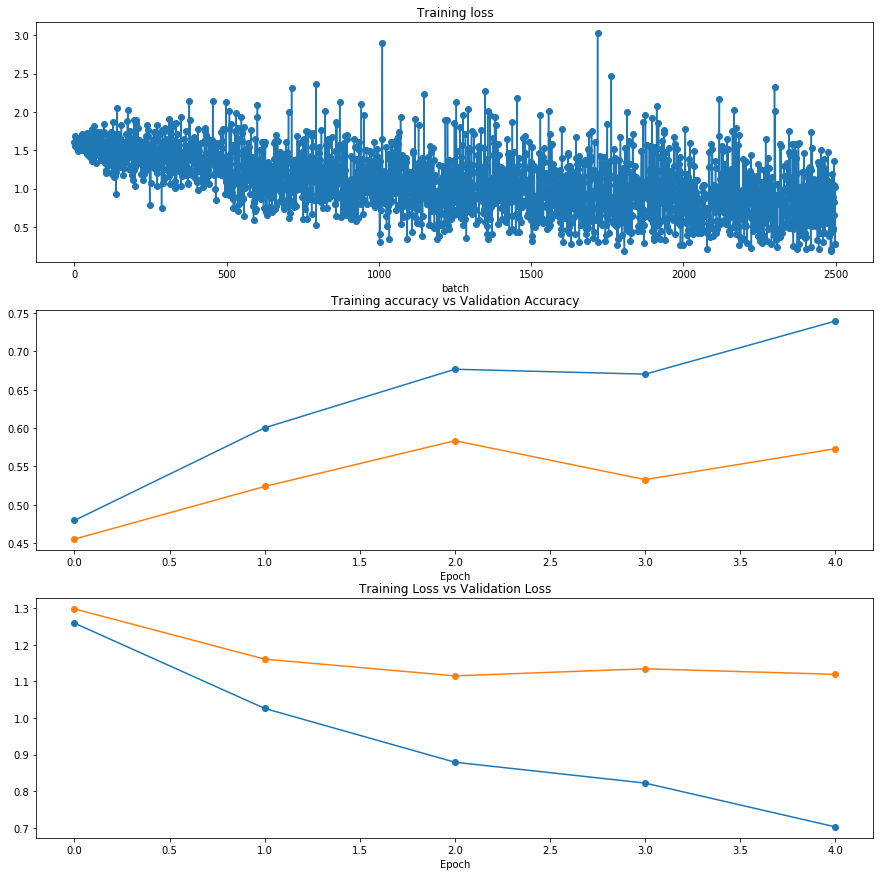

In [21]:
net = Network()
net.train(5, 5, 0.01, 0.001, train_set, train_labels)

### 5. Using the testing set, report your Correct Classification Rate of each of the 5 classes separately. (compare against K-NN classifier from assignment 1). [1%]


In [22]:
test_acc = net.test(test_set, test_labels)
print(test_acc[0])

0.604


### 6. Average Correct Classification Rate (ACCR) using the testing set. [4%] competitive. Best student will receive 4% and others will get credit relative to how far their predictions are from the best one].

In [23]:
for i in range(0, 5):
    test_acc = net.test(test_set[i*100:(i+1)*100], test_labels[i*100:(i+1)*100])
    print(test_acc[0])

0.58
0.78
0.26
0.87
0.53
